<a href="https://colab.research.google.com/github/santiagoahl/ml_/blob/main/Solucion_entrega_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Santiago Ahumada Lozano

ID: 1000151171

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import choice
import math

# Exercise 1.12

A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has 4,000 data points. She is willing to pay you to solve her problem and produce and produce for her a $g$ which approximates $f$. What is the best that you can promise her among the following:






1.   After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.


2.   After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.


3. One of two things will happen.


*   You will produce a hypothesis $g$;
*   You will declarate that you failed.

If you do return a hypothesis $g$, then with high probability the $g$ which you will produce will approximate $f$ well out of sample.

## Solution

The best I can promise to her is **third option**. 

At first. I cannot promise her that the hypothesis $g$ returned by my algorithm will for sure aproximate the target function $f$ since we don't know wether this problem has an deterministic (or analytic) solution. 

Secondly, even though the second and third options are actually similar. I state that the third one gives us a best "promise" since, in fact, I cannot guarantee if any of my purposed algorithms will converge, futher more, that converges to a solution which do well out of the 4,000 sample examples and therefore, that learns.

# Problem 1.2

Consider the perceptron in two dimension: $h(\mathbf{x}) = sign ( \mathbf{w} ^T \mathbf{x})$ where $\mathbf{w} = [w_0, w_1, w_2]^T$ and $\mathbf{x} = [1, x_1, x_2]^T$. Technically, $\bf x$ has three coordinates but we call this perceptron two-dimensional because the first coordinate is fixed at 1.


## **(a)** 
Show that the regions on the plane where $h(\mathbf{x})= +1$ and $h(\mathbf{x}) = -1$ are separated by a line. If we express this line by the equation $x_2 = ax_1 + b$, what are the slope $a$ and the intercept $b$ in terms of $w_0, w_1, w_2$?


**Solution**

Since the value of $h$ at every point $\mathbf{x}\in\{1\}\times \mathbb{R}^2$ depends of $sign ( \mathbf{w} ^T \mathbf{x})$, namely,

  \begin{align*}
    h(\mathbf{x}) = \left\{
                        \begin{aligned}
                            &+1, \mathbf{w}^T\mathbf{x}>0 \\
                            &+1, \mathbf{w}^T\mathbf{x}>0  
                        \end{aligned}
                    \right.
  \end{align*}

Hence the partition on the plane made by $h$ depends only on the points $\bf x$ such that $\mathbf{w}^T\mathbf{x}=0$, or equivalently, the equation 

$$
w_0 + w_1x_1 + w_2x_2 = 0
$$

determines the partition mentioned, solving for $x_2$ we obtain,

$$
x_2 = (\frac{-w_1}{w_2})x_1+(\frac{-w_0}{w_2})
$$

And therefore, the regions $h^{-1}\{+1\}$ and $h^{-1}\{-1\}$ are separated by the line $\mathcal{L} = \{(x_1, x_2): x_2 = ax_1+b\}$ where the slope
$$
a = \frac{-w_1}{w_2}
$$ 
and the intercept 

$$
b = \frac{-w_0}{w_2}
$$.


## **(b)**
Draw a picture for the cases $\mathbf{w} = [1,2,3]^T$ and $\mathbf{w} = -[1,2,3]^T$


**Solution**

According with the previous item, we have that the picture asociated with $\mathbf{w} = [1,2,3]^T$ is the $\mathbb{R}^2$ plane separated in two parts by the line defined by
$$
x_2 = \frac{-2x_1}{3} + \frac{-1}{3}
$$

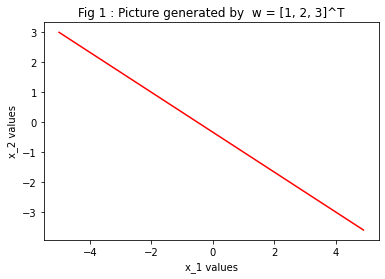

In [3]:
picture = plt
picture.title('Fig 1 : Picture generated by  w = [1, 2, 3]^T')
picture.xlabel('x_1 values')
picture.ylabel('x_2 values')
X_1 = np.arange(-5,5,0.1)
X_2 = (-1/3)*(2*X_1+1)
line = picture.plot(X_1, X_2, color = 'red')
picture.show()

By an analogous way, for  $\mathbf{w} = -[1,2,3]^T$ we obtain the line defined by
$$
  x_2 = \frac{-2x_1}{3} + \frac{-1}{3}
$$
whose picture is clearly the same as $\mathbf{w} = [1,2,3]^T$. But the difference in this case, is that $h^{-1}\{+1\}$ and  $h^{-1}\{-1\}$ swap on side on the plane.

In more than two dimensions, the $+1$ and $-1$ regions are separated by a *hyperplane*, the generalization of a line.

# Problem 1.4

In excercise 1.4, we use an artificial data set to study the perceptron learning algorithm. This problem leads you to explore the algorithm further with data sets of different sizes and dimensions.

## **(a)**

Generate a linearly separable data set of size 20. Plot the examples $\{(x_n,y_n): n=1,...,20\}$, as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.

**Solution**

The linear separability will be guaranteed by the construction of a line that splits the plane into two parts. We chose the line defined by the weight vector $\mathbf{w} = [1, 2, 3]^T$. As we seen in **problem 1.2**, it is

\begin{equation}
y = -\frac{2}{3}x-\frac{1}{3}
\end{equation}

Then, our artificial target function is defined by 

$$
f([x,y]) = sign(1 + 2x + 3y), \forall x,y\in\mathbb{R}.
$$

The way we built our dataset is as follows. Every input vector $\mathbf{x_n} = [1, x_{n1}, x_{n2}]^T$, is defined by the equation

$$
x_{n2} = g(x_{n1}) + \epsilon_n
$$

where $x_{n1}$ is a number selected randomly from $(-10, 10)$ and $g(x) = -\frac{2}{3}x-\frac{1}{3}$ ($(x,g(x))$ belongs to the line defined). And $\epsilon_n$ is some noise term selected randomly from $(-5,-\frac{3}{2})\cup(\frac{3}{2},5)$. Now we present de plotted examples $\bf x_1, ... , x_n$:

In [4]:
#Def of the datapoints

def g(x_1):
  y = (-1/3)*(2*x_1+1)
  return y

In [5]:
#Random generation of a dataset of size 20
def random_dataset(N):
  #print(str(N))
  X_1 = np.zeros(N)
  X_2 = np.zeros(N)
  eps = np.zeros(N)

  for i in range(N):
    x_1 = choice (np.arange(-10,10)) 
  
    eps[i] = choice([-1,1])*choice(np.arange(1.5,5,0.4))
    x_2 = g(x_1) + eps[i]
    X_1[i] = round(x_1, 2)
    X_2[i] = round(x_2, 2)
  return X_1, X_2
N = 20
X_1, X_2 = random_dataset(N)
X_1

array([-6., -7.,  3., -1.,  3.,  0.,  9.,  9., -1.,  8., -2., -2.,  8.,
        6., -6., -8.,  7.,  7.,  8.,  8.])

In [6]:
#Target function, Splits the +1 points and the -1 points correctly
def f(X_1, X_2):
  weights = [1, 2, 3]  
  X = [1, X_1, X_2]
  #u = w[0]+w[1]*X_1+w[2]*X_2
  v = np.dot(weights,X)
  y = int(np.sign(v))
  return y 
#f(7, -2.3)

In [7]:
#the returned hypothesis value given the weight vector
def h(x_1, x_2, w):
    X = [1, x_1, x_2]
    v = np.dot(w,X)
    hyp = int(np.sign(v))
    return hyp

#The returned line given the weight vector

def line_h(X,w_0, w_1, w_2):
  a = -float(w_1/w_2) #slope
  b = -float(w_0/w_2) #intercept
  Y = (a*X)+b
  return Y

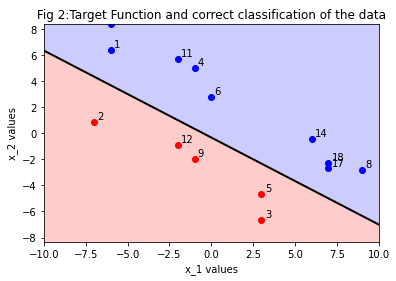

In [8]:
#Plot
picture = plt
picture.xlabel('x_1 values')
picture.ylabel('x_2 values')
X = np.arange(-12,12,0.1)
Y = g(X)

#picture.scatter(X_1, X_2)

def split_into_colors(X_1,X_2, N, enumerate):#Splits the +1 and -1 points into colors
  Blues_X_1 = np.zeros(N)
  Blues_X_2 = np.zeros(N)
  Reds_X_1 = np.zeros(N)
  Reds_X_2 = np.zeros(N)
  Blacks_X_1 = np.zeros(N)
  Blacks_X_2 = np.zeros(N)
  b = 0
  r = 0
  for i in range(N):
    x_1 = X_1[i]
    x_2 = X_2[i]
    if enumerate:
        picture.annotate(str(i+1),(x_1+0.2,x_2+0.2))
    if f(x_1, x_2) == 1:
      #print('x_'+str(i+1)+' es azul')
      Blues_X_1[b] = x_1
      Blues_X_2[b] = x_2 
      b += 1
    elif f(x_1, x_2) == -1:
      #print('x_'+str(i+1)+' es rojo')
      Reds_X_1[r] = x_1
      Reds_X_2[r] = x_2
      r += 1
  return Blues_X_1, Blues_X_2, Reds_X_1, Reds_X_2, b, r

Blues_X_1, Blues_X_2, Reds_X_1, Reds_X_2, b, r= split_into_colors(X_1,X_2, 20, enumerate = True)
picture.xlim([-10,10])
m = max(abs(g(12)), abs(g(-12)))
picture.ylim([-m,m])
picture.title('Fig 2:Target Function and correct classification of the data')
picture.scatter(Blues_X_1[0:b], Blues_X_2[0:b], color = 'blue')
picture.scatter(Reds_X_1[0:r], Reds_X_2[0:r], color = 'red')
picture.plot(X, Y, color = 'black', linewidth = 2)
picture.fill_between(X, Y, 20, color = 'blue', alpha = 0.2)
picture.fill_between(X, -20, Y, color = 'red', alpha = 0.2)
picture.show() 

## **(b)** 
Run the perceptron learning model algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot de examples $\{(x_n, y_n)\}_{n=1}^{20}$, the target function $f$, and the final hypothesis $g$ in the same figure. Comment on wether $f$ is close to $g$.



**Solution**

Consider first the correct labeling from $y_1$ up to $y_{20}$ of each input data $\mathbf{x}_n=[1,x_1,x_2]$ as follows (Recall that they have a plot by the *figure 2*).

In [10]:
#Plotting the Dataset as a data frame

def plot_DataFrame(X_1, X_2, N):
  Y_outputs = [f(X_1[i], X_2[i]) for i in range(N)]
  dataframe = {'x_1 Values' : X_1, 'x_2 Values' : X_2, 'y Values' : Y_outputs}
  dataframe = pd.DataFrame(dataframe)
  return dataframe, Y_outputs

n_elements = N
dataframe, Y_outputs = plot_DataFrame(X_1, X_2, n_elements)
dataframe 

,x_1 Values,x_2 Values,y Values
0,-6.0,6.37,1
1,-7.0,0.83,-1
2,3.0,-6.63,-1
3,-1.0,5.03,1
4,3.0,-4.63,-1
5,0.0,2.77,1
6,9.0,-9.43,-1
7,9.0,-2.83,1
8,-1.0,-1.97,-1
9,8.0,-9.97,-1


We designed a function that prints the split of the plane of each hypothesis $h$, which is completely determined by its weight vector $\bf w$ as follows.

In [11]:
 #Plots the hypothesis clasification of N data points for w = [w_0, w_1, w_2]^T vs the correct one

 def print_hypothesis(X_1, X_2, w, N, enumerate):
   w_0 , w_1, w_2 = w[0], w[1], w[2]
   ax = plt
   X = np.arange(-10,10,0.1)
   Y = g(X)
   ax.title('Fig 3 : Correct classification vs Hypothesis classification of data')
   Blues_X_1, Blues_X_2, Reds_X_1, Reds_X_2, b, r = split_into_colors(X_1,X_2, N, enumerate)
   ax.scatter(Blues_X_1[0:b], Blues_X_2[0:b], color = 'blue')
   ax.scatter(Reds_X_1[0:r], Reds_X_2[0:r], color = 'red')
   #picture.scatter(Blacks_X_1[0:num], Blacks_X_2[0:num], color = 'black') 
   ax.plot(X, Y, color = 'black', linewidth = 2.5)
   picture.xlim([-10,10])
   m = max(abs(g(12)), abs(g(-12)))
   picture.ylim([-m,m])
   picture.xlabel('x_1 values')
   picture.ylabel('x_2 values')  
   orientation = 1 #Splits or preserves the section of the plane h^-1{+1} vs h^-1{-1}
   #if w_1*w_2 < 0 :
   if w_2 !=0:
     if w_1*w_2 < 0 or (w_1 < 0 or w_2 <0):
       orientation = -1 
     Y = line_h(X,w_0,w_1,w_2)
     ax.plot(X, Y, color = 'purple')
     ax.fill_between(X, Y, orientation*25, color = 'blue', alpha = 0.2)
     ax.fill_between(X, orientation*(-25), Y, color = 'red', alpha = 0.2)
   else:
     if w_1 != 0:
       theta = -float(w_0/w_1)
       ax.axvline(theta, 0, 1, color = 'purple')
     if w_1 > 0:
       plt.axvspan(-10, theta, facecolor='blue', alpha=0.2)
       plt.axvspan(10, theta, facecolor='red', alpha=0.2)
     elif w_1 < 0:
       plt.axvspan(10, theta, facecolor='blue', alpha=0.2)
       plt.axvspan(-10, theta, facecolor='red', alpha=0.2)
   ax.show() 

Now, for $\mathfrak{D}=\{(\mathbf{x}_1,y_1), ... , (\mathbf{x}_{20},y_{20}) \}$ (The dataset given by the previous Dataframe), we run the **perceptron algorithm** which finds a weight vector $\mathbf{w}_{p.l.a.}$ defined as de limit of the recursive definition,
$$
  \mathbf{w}_{t+1} = \mathbf{w}_t + \sum_{\mathbf{x}_n\in M_t}y_n\mathbf{x}_n;  t=0, 1 ,...
$$
Where $M_t$ is the collection of the inputs $\mathbf{x}_n$ ($n\in\mathbb{N}$) misclassified resulting from the classification given from $\mathbf{w}_t$ (An equivalent update rule from the one proposed by the book). 

Initial weight vector : w =  [-1, -2, -3]


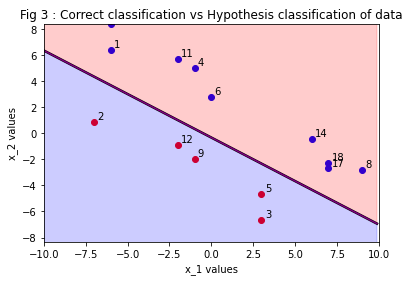

The point x_1 is misclassified !
Fit for x_1 :


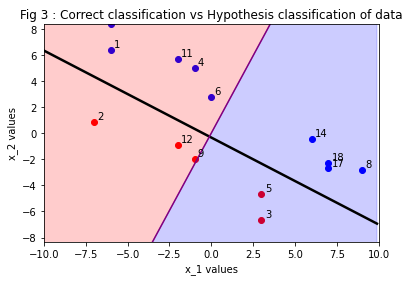

The point x_2 is misclassified !
Fit for x_2 :


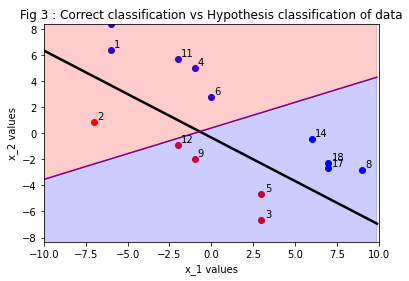

The point x_8 is misclassified !
Fit for x_8 :


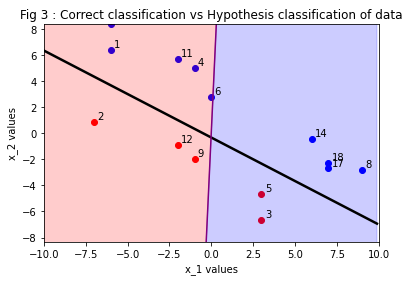

The point x_10 is misclassified !
Fit for x_10 :


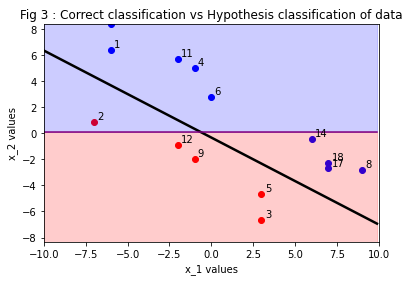

The point x_14 is misclassified !
Fit for x_14 :


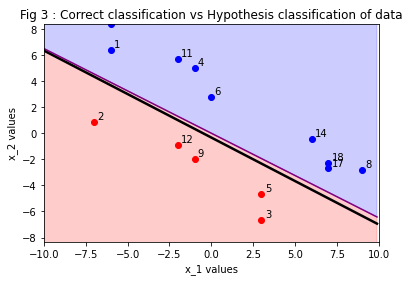

Well classified points at iteration #20 : 15
Well classified points at iteration #40 : 20

 All the points are well classified by the current hypothesis
f is close to the generated hypothesis g
-->The algorithm took 40 inspection steps (2 cycles over the Dataset) and 5 updates before coverging
-->Final weight vector w =  [0.   6.   9.25]


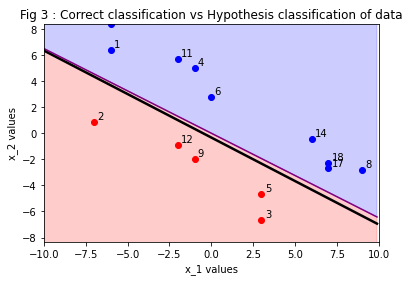

In [12]:
#PLA for a given Dataset
def PLA(X_1, X_2, Y_outputs, N, w, enumerate):
  #w = np.zeros(3)
  #w = [-1,-2,-3] #"worst" case
  nclassified = 0
  ninterations = 0
  nfits = 0
  print('Initial weight vector : w = ',w)
  print_hypothesis(X_1, X_2, w, N, enumerate)
  while nclassified < N:
    fit = np.zeros(3)
    error = 0
    for n in range(N):
      ninterations += 1
      x_1 = X_1[n]
      x_2 = X_2[n]
      hypothesis = h(x_1, x_2, w)
      y=Y_outputs[n]
      if hypothesis != y:
        print('The point x_'+ str(n+1) + ' is misclassified !')
        fit = [y, y*x_1, y*x_2]
        w = np.add(w,fit) # w = w + fit (the update rule) 
        print('Fit for x_'+ str(n+1)+ ' :')
        print_hypothesis(X_1, X_2, w, N, enumerate)
        nfits += 1
      else:
        nclassified += 1  
    print('Well classified points at iteration #'+str(ninterations)+' : ' + str(nclassified))
    if nclassified == N:
      print('\n All the points are well classified by the current hypothesis')
      print('f is close to the generated hypothesis g')
      print('-->The algorithm took '+ str(ninterations)+ ' inspection steps ('+ str(int(ninterations/N))+' cycles over the Dataset) and '+str(nfits)+' updates before coverging')
      break
    nclassified =0
  print('-->Final weight vector ' + 'w = ', w)
  print_hypothesis(X_1, X_2, w, N, enumerate)
  #return :)
w = [-1,-2,-3] #"worst" case
PLA(X_1, X_2, Y_outputs, 20, w, enumerate = True)
  


For the dataset specified by:


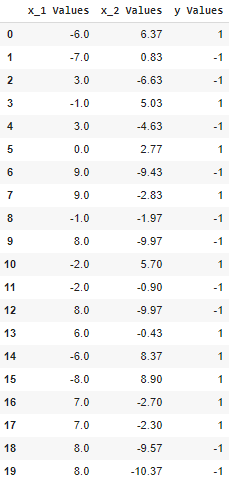


We got the following classification (Specified by the target function $f$):

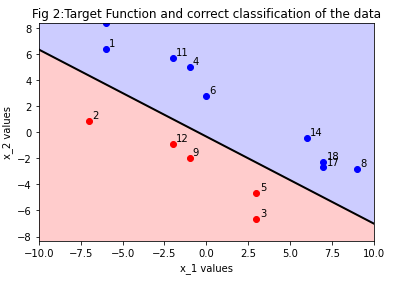





Finally, the **PLA** gave us the weight vector $\mathbf{w}_{p.l.a}=[1, 4, 7.74]$. It took **6** updates from $\mathbf{w}_0=[-1,-2,-3]$ and the resulting hypothesis given by $\mathbf{w}_{p.l.a}$ is close to $f$.

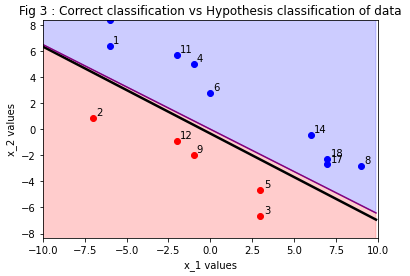

## **(c)** 
Repeat everything in (b) with another randomly generated data set of size 20. compare your results with (b)

**Solution**

In [ ]:
#New randomly generated Dataset of size N = 20

N = 20
X_1, X_2 = random_dataset(N)
dataframe, Y_outputs = plot_DataFrame(X_1, X_2, N)
dataframe

,x_1 Values,x_2 Values,y Values
0,7.0,-3.50,1
1,-9.0,9.17,1
2,-8.0,8.90,1
3,-2.0,2.90,1
4,0.0,1.97,1
5,9.0,-2.43,1
6,8.0,-8.37,-1
7,2.0,1.43,1
8,-9.0,1.77,-1
9,1.0,-4.50,-1


Initial weight vector : w =  [0. 0. 0.]


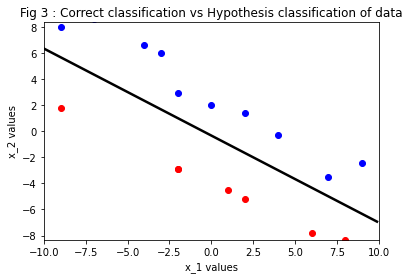

The point x_1 is misclassified !
Fit for x_1 :


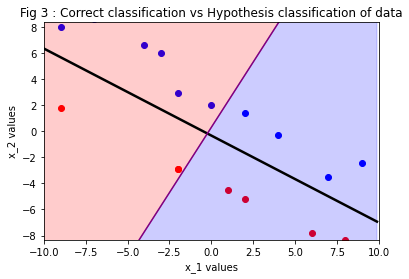

The point x_2 is misclassified !
Fit for x_2 :


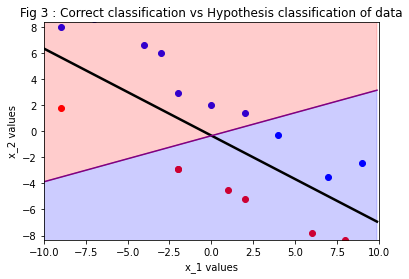

The point x_6 is misclassified !
Fit for x_6 :


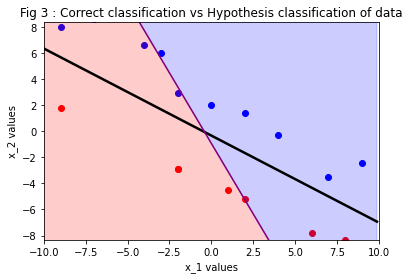

The point x_7 is misclassified !
Fit for x_7 :


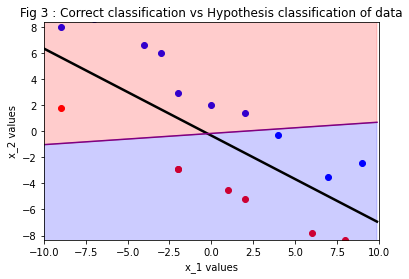

The point x_9 is misclassified !
Fit for x_9 :


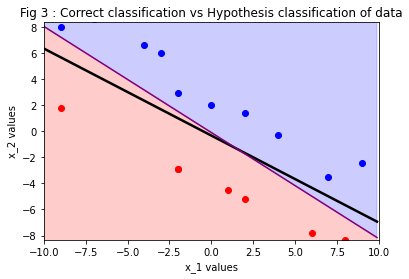

Well classified points at iteration #20 : 15
Well classified points at iteration #40 : 20

 All the points are well classified by the current hypothesis
f is close to the generated hypothesis g
-->The algorithm took 40 inspection steps (2 cycles over the Dataset) and 5 updates before coverging
-->Final weight vector w =  [1.   8.   9.84]


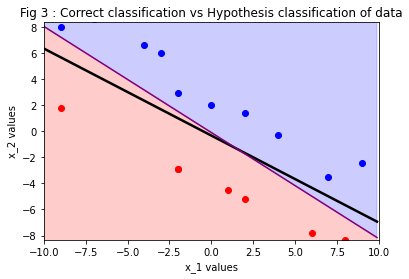

In [ ]:
#PLA for the new Dataset
w = np.zeros(3)
PLA(X_1, X_2, Y_outputs, N, w, enumerate=False)

For the dataset specified by:
The algorithm took **4** updates (against 6 of the previous one) and $\mathbf{w}_{p.l.a}= [0, 6, 11.61]$ (against $[1, 4, 7.74]$ of the previous one) which is generates a hypothesis $g$ also glose to $f$.


## **(d)** 
Repeat everything in (b) with another randomly generated data set of size **100**. Compare your results with (b)

**Solution**

We create the Dataset as follows:

In [ ]:
N = 100
X_1, X_2 = random_dataset(N)
dataframe, Y_outputs = plot_DataFrame(X_1, X_2, N)
dataframe

,x_1 Values,x_2 Values,y Values
0,-1.0,3.03,1
1,2.0,-5.57,-1
2,-1.0,4.23,1
3,-8.0,3.10,-1
4,1.0,-4.90,-1
...,...,...,...
95,-2.0,-2.10,-1
96,3.0,-0.83,1
97,-3.0,3.57,1
98,-6.0,-0.23,-1


And we run the PLA for $N = 100$ data points (PLA was functionally programmed on $N$)

Initial weight vector : w =  [0. 0. 0.]


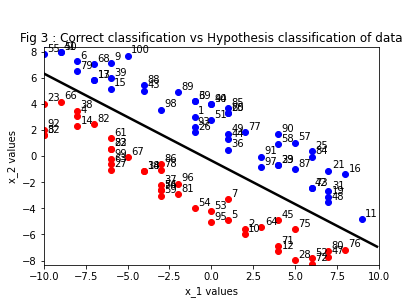

The point x_1 is misclassified !
Fit for x_1 :


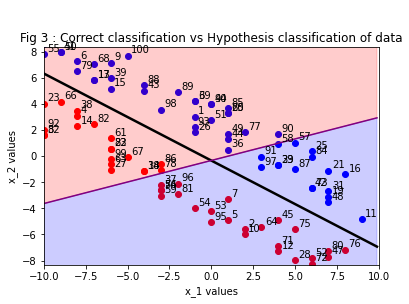

The point x_4 is misclassified !
Fit for x_4 :


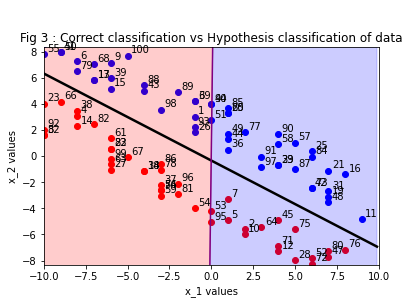

The point x_5 is misclassified !
Fit for x_5 :


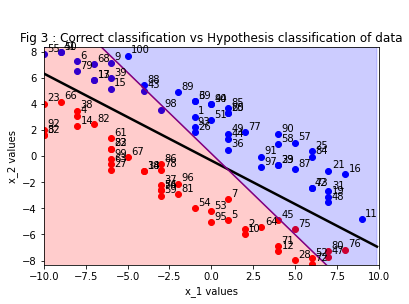

The point x_6 is misclassified !
Fit for x_6 :


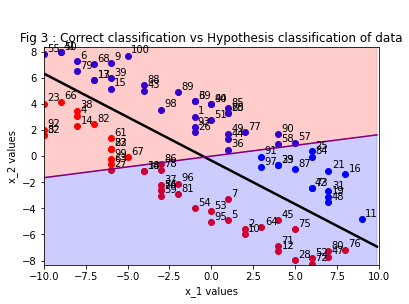

The point x_8 is misclassified !
Fit for x_8 :


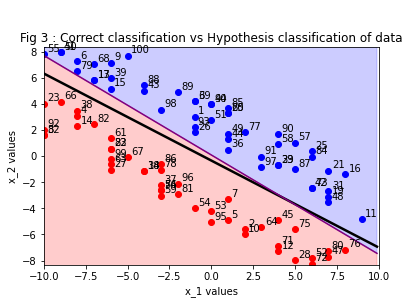

Well classified points at iteration #100 : 95
Well classified points at iteration #200 : 100

 All the points are well classified by the current hypothesis
f is close to the generated hypothesis g
-->The algorithm took 200 inspection steps (2 cycles over the Dataset) and 5 updates before coverging
-->Final weight vector w =  [-1.   8.  10.5]


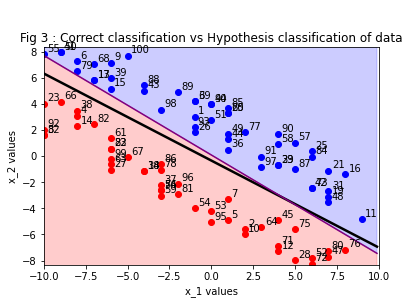

In [ ]:
w = np.zeros(3) #Three features
PLA(X_1, X_2, Y_outputs, N, w, enumerate = True)

After attempting several times, we expect approximately **10** updates before converging (a bit more as the **6** and **4** given by the case $N=20$) and a weight weight vector $\mathbf{w}=[2,13,16.46]$. The algorithm still converges and splits the plane correctly.

## **(e)** 
Repeat everything in (b) with another randomly generated data set of size $1000$. Compare your results with **(b)**

**Solution**


At first we generate a data set of size $N=1000$:

In [ ]:
N = 1000
X_1, X_2 = random_dataset(N)
dataframe, Y_outputs = plot_DataFrame(X_1, X_2, N)
dataframe

,x_1 Values,x_2 Values,y Values
0,7.0,-3.50,1
1,-8.0,7.30,1
2,-2.0,5.70,1
3,-6.0,0.97,-1
4,-1.0,-2.37,-1
...,...,...,...
995,-4.0,5.43,1
996,7.0,-1.50,1
997,1.0,-3.70,-1
998,-2.0,4.10,1


And run the **PLA** for $N=1000$:

Initial weight vector : w =  [0. 0. 0.]


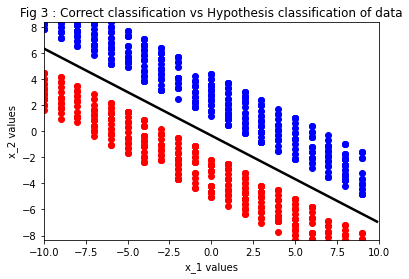

The point x_1 is misclassified !
Fit for x_1 :


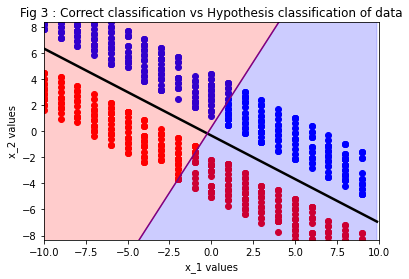

The point x_2 is misclassified !
Fit for x_2 :


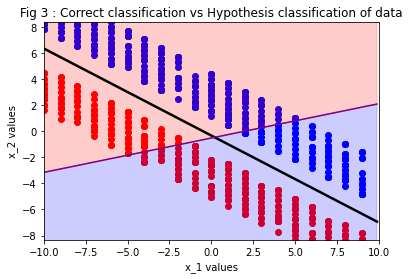

The point x_4 is misclassified !
Fit for x_4 :


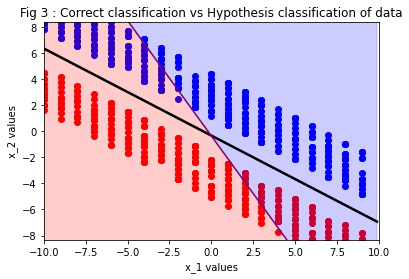

The point x_8 is misclassified !
Fit for x_8 :


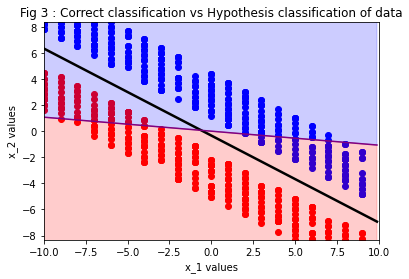

The point x_16 is misclassified !
Fit for x_16 :


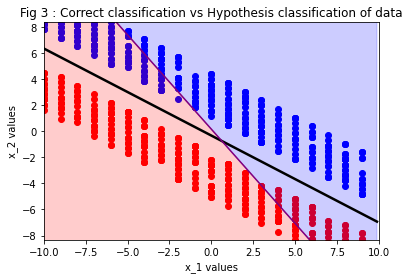

The point x_18 is misclassified !
Fit for x_18 :


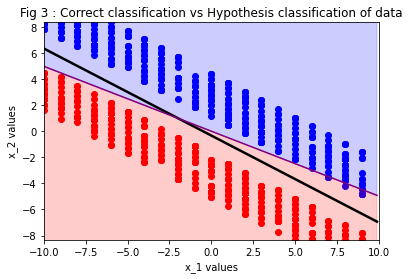

The point x_123 is misclassified !
Fit for x_123 :


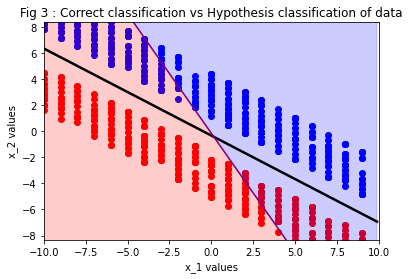

The point x_126 is misclassified !
Fit for x_126 :


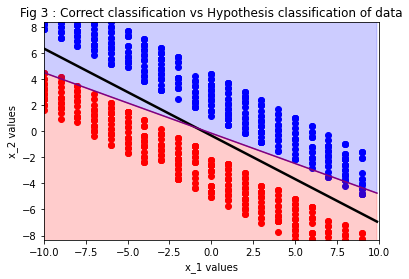

The point x_257 is misclassified !
Fit for x_257 :


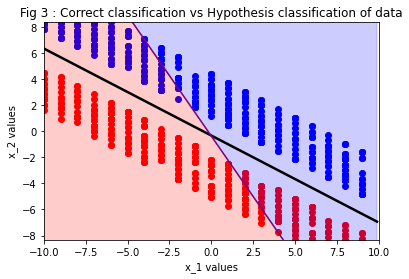

The point x_262 is misclassified !
Fit for x_262 :


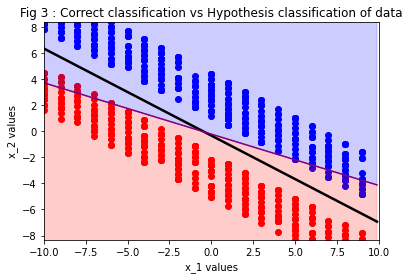

The point x_282 is misclassified !
Fit for x_282 :


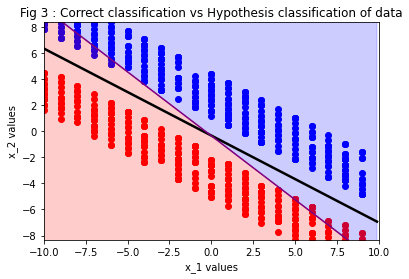

The point x_335 is misclassified !
Fit for x_335 :


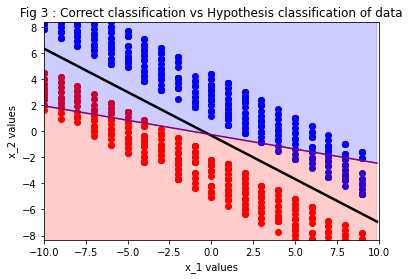

The point x_337 is misclassified !
Fit for x_337 :


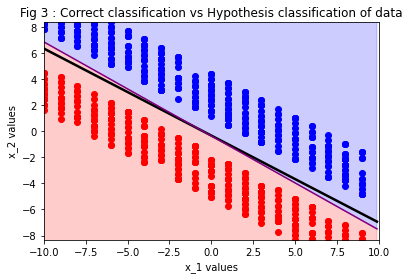

Well classified points at iteration #1000 : 987
Well classified points at iteration #2000 : 1000

 All the points are well classified by the current hypothesis
f is close to the generated hypothesis g
-->The algorithm took 2000 inspection steps (2 cycles over the Dataset) and 13 updates before coverging
-->Final weight vector w =  [ 7.   14.   19.44]


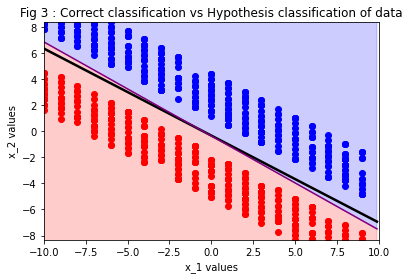

In [ ]:
PLA(X_1, X_2, Y_outputs, N, w, enumerate = False)

After some attempts, we expect convergence for **17** updates and no more than **2** cycles , not much different as the previous ones. (Notice that the algorithm has more "trivial" steps used for inspection, so that's why the algorithm will have "linearly" more data).
PLA seems to have polynomial complexity.

## **(f)** 
Modify the algorithm such that it takes $\mathbf{x}_n\in\mathbb{R}^{10}$ instead of $\mathbb{R}^2$. Randomly generate the dataset to the algorithm. How many updates does the algorithm take to converge?

**Solution**

We must modify the algorithms created 

```
random_dataset(N)
plot_DataFrame(X_1, X_2, N)
PLA(X_1, X_2, Y_outputs, N, w, enumerate)
```
In order to take $\mathbf{C}_1,...\mathbf{C}_{10}$ data features instead of $2$ (X_1 and X_2). In fact we may code them to receive $d$ features. Creating linearly separable datasets in higher dimensions requires new formulas for the error vectors


In [42]:
def idealWeightVector(d):  
  W = [i+1 for i in range(d+1)] #Weight vector of the target function (Can be changed)
  return W

In [44]:
#Returns the correct label for each point X, requires a defined weight vector 

def f(X, d):
  p = np.dot(X,W)
  y = int(np.sign(p))
  return y

"""
d=10
X=[-i*i*i for i in range(d+1)]
f(X, 10)
"""

'\nd=10\nX=[-i*i*i for i in range(d+1)]\nf(X, 10)\n'

In [45]:
# Receives the first 1,x_1,...x_d-1 and return x_d such that the "point" X = [x_1,..,x_d] belongs to the hyperplane of the target function

def L(X, d):
  #print(str(len(X)))
  
  v = [W[i] for i in range (d)]
  #print('v'+str(len(v)))
  y = (-1/W[d])*(np.dot(v,X))
  return y

"""
d=10
x = [(2*i) for i in range(d)]
L(x,d)
"""

'\nd=10\nx = [(2*i) for i in range(d)]\nL(x,d)\n'

In [51]:
# Returns a random data set of size n and dimension d+1 (outliers) with form of pandas - data frame

def randomDataset(W, N, d):
  D = np.zeros((N,d+1))
  for n in range(N):
    X = np.zeros(d)
    X[0] = 1
    for i in range(1,d):
      X[i] = choice(np.arange(-50, 50,0.5))
    eps = choice([-1,1])*choice(np.arange(20,100,0.5)) #noise
    x_d = L(X,d) + eps
    #print(str(n))
    #print(X)                 #Desactivando los comentarios podemos evidenciar como el dataset va llenandose de los vectores X_1,...X_N
    X = np.concatenate((X, [x_d]))
    #print(X)
    D[n,:] = X
    #print(D)
  
  D = pd.DataFrame(D)
  return D

"""
N, d = 10, 15
d = randomDataset(N, d)
d = pd.DataFrame(d)
d 
"""

'\nN, d = 10, 15\nd = randomDataset(N, d)\nd = pd.DataFrame(d)\nd \n'

In [47]:
# Returns the hypothesis' labeling (defined by its weight vector w) in a point x

def hypothesis(X, w):
  p = np.dot(X,w)
  h = int(np.sign(p))
  return h

"""
d = 50
X=[i+1 for i in range(d+1)]
w=[-2*i for i in range(d+1)]
hypothesis(X,w)
"""


'\nd = 50\nX=[i+1 for i in range(d+1)]\nw=[-2*i for i in range(d+1)]\nhypothesis(X,w)\n'

In [48]:
#Returns the datapoints with the correct and the hypotesis' labels

def results(Y, H, N):
  X = ['X_'+str(i+1) for i in range(N)]
  labels = {'X values': X, 'Correct labels y_n': Y, 'Hypothesis labels h': H}
  d = pd.DataFrame(labels)
  return d

"""
N=20
Y = [-1 for i in range(N)]
H = [1 for i in range(N)]
d= results(Y, H, N)
d
"""




'\nN=20\nY = [-1 for i in range(N)]\nH = [1 for i in range(N)]\nd= results(Y, H, N)\nd\n'

In [49]:
#Receives a DataFrame and its dimension, returns the hypothesis (Its weight vector) that classifies the dataset

def generalized_PLA(D, N, d, p, random):
  D = D.to_numpy()
  w=np.zeros(d+1)
  correct_labels = np.zeros(N)
  hypothesis_labels = np.zeros(N)
  num_classified = 0
  num_interations = 0
  num_fits = 0

  while num_classified < N:
    for n in range(N): #We inspect the datapoints
      num_interations += 1
      k = n
      if random == True:
        k = int(choice(np.arange(0,N)))
      X = D[k,:]  #Escogemos el n-esimo datapoint
      h = hypothesis(X, w)
      hypothesis_labels[n] = h
      y = f(X, d)
      correct_labels[n] = y
      if h != y:
        num_fits +=1
        fit = [y*X[i] for i in range(len(X))] #update rule
        w += fit
      elif h == y:
        num_classified += 1
      #print('Well classified points at iteration #'+str(num_interations)+' : ' + str(num_classified))
    if num_classified == N:
      if p == True:
        print('\n All the points are well classified by the current hypothesis')
        print('f is close to the generated hypothesis h')
        print('-->The algorithm took '+ str(num_interations)+ ' inspection steps ('+ str(int(num_interations/N))+' cycles over the Dataset) and '+str(num_fits)+' updates before coverging')
      break 
    if p == True:
      print('Well classified points at iteration #'+str(num_interations)+' : ' + str(num_classified))
    num_classified = 0
    if p == True:
      print('-->Final weight vector ' + '\n w = \n', pd.Series(w))
  return num_fits, correct_labels, hypothesis_labels
    
  


According with the problem's requirements, we put 

$$ N = 1000 $$

and 

$$ d = 10 $$

so we obtain the following dataset (Each column is a feature and each row is a data point)

In [52]:
N = 1000
d = 10
W = idealWeightVector(d)
D = randomDataset(W, N, d)
print('Data Frame:')
D

Data Frame:


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,17.5,45.5,-4.0,-35.5,6.0,48.0,-2.0,42.0,-14.5,-131.636364
1,1.0,-50.0,-10.0,6.5,40.0,28.5,-8.5,-29.5,-34.5,3.5,-25.454545
2,1.0,7.5,-19.0,-43.0,-38.5,-4.5,2.0,42.0,-30.5,-45.5,47.318182
3,1.0,30.0,-18.0,21.5,1.0,30.5,14.5,31.5,-36.0,3.5,-85.909091
4,1.0,15.5,-47.0,11.0,-18.0,-11.5,0.0,3.0,-29.0,-13.0,140.227273
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-2.5,9.0,-40.0,44.0,11.0,17.0,-12.5,47.0,27.5,-16.727273
996,1.0,3.0,13.5,29.0,46.5,-7.5,-22.0,-12.0,-10.0,-23.0,-33.090909
997,1.0,-40.5,36.5,35.0,-25.0,40.5,-33.5,-8.0,-23.0,14.5,32.636364
998,1.0,-8.0,3.5,36.5,35.0,-8.5,9.0,23.0,3.0,14.5,-143.227273


The $PLA$ gives the following results:

In [53]:
updates, Y, H = generalized_PLA(D, N, d, p = True, random = False)


Well classified points at iteration #1000 : 977
-->Final weight vector 
 w = 
 0      -7.000000
1      40.000000
2      68.000000
3      32.500000
4      67.500000
5     122.000000
6     114.000000
7     135.500000
8     144.500000
9     211.500000
10    182.681818
dtype: float64

 All the points are well classified by the current hypothesis
f is close to the generated hypothesis h
-->The algorithm took 2000 inspection steps (2 cycles over the Dataset) and 23 updates before coverging




1.   The set was correctly classified by the perceptron, we can see this in the following table




In [54]:
r = results(Y, H, N)
r


,X values,Correct labels y_n,Hypothesis labels h
0,X_1,-1.0,-1.0
1,X_2,-1.0,-1.0
2,X_3,-1.0,-1.0
3,X_4,-1.0,-1.0
4,X_5,1.0,1.0
...,...,...,...
995,X_996,1.0,1.0
996,X_997,-1.0,-1.0
997,X_998,1.0,1.0
998,X_999,-1.0,-1.0


In [55]:
#see if X_n was well classified by PLA
n = 555
r.iloc[[n-1]]

,X values,Correct labels y_n,Hypothesis labels h
554,X_555,1.0,1.0


## **(g)**
Repeat the algorithm on the same data set a **(f)** for $100$ experiments. In the iterations of each one, pick $\mathbf{x}(t)$ randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm tajes to converge

**Solution**



The average number of updates is:  23


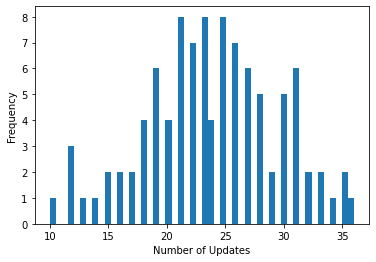

In [56]:
nExperiments = 100
N = 1000
d = 10
Updates = np.zeros(nExperiments)
mean = 0

for i in range(nExperiments):
  updates, Y, H = generalized_PLA(D, N, d, p = False, random = True)
  Updates[i] = updates
  mean += updates

mean = int(mean/nExperiments)
plt.xlabel('Number of Updates')
plt.ylabel('Frequency')
plt.hist(Updates, bins = 50)

print('The average number of updates is: ', mean)
  

## **(h)**

Summarize your conclusions with respect to accuracy and running time as a function of $N$ and $d$.

**Conclusions**

  1. So far, the **accuracy** of the $PLA$ was perfect in all experiments. Even if the data set have a big number of data points, and these points have lots of features, the algorithm converges. But we know that this convergence is doubt to the fact that the dataset is linearly separable. 

  2. The **running time depends** of both $N$ and $d$. Calculating the hypothesis' label becomes linearly more complex as $d\rightarrow\infty$. And doing the inspection over the dataset becomes a linearly more complex work as $N\rightarrow\infty$.

  3. In terms of **efficiency** we may claim that in general the algorithm will need to take more cycles (Complete iterations over the dataset) as the size $N$ increases since

  $$ \mathbb{P}[\text{There's some misclassified datapoint}] $$

  increases as $N\rightarrow\infty$.
  
  But also will take less cycles as the number of features $d$ increases since the perceptron makes a more accurate *fit* for each misclassified data point that may affect other misclassified data point in a single iteration.
  



# Problem 1.6

Consider a sample of $10$ marbles drawn independly from a bin that holds red and green marbles. The probability of a red marble is $\mu$. For $\mu = 0.05, \mu = 0.5$ and $\mu = 0.8$, compute the probability of getting no red marbles ($\nu =0 $) in the following cases.

## **(a)**

We draw only one such sample. Compute $\mathbb{P}[\nu =0]$.

### Solution

Notice that, for $N :=$ number of marbles, $\nu$ has probality mass function

$$
  p(\nu = x) = \binom{N}{x}\mu^x(1-\mu)^{N-x}
$$

Then

\begin{align}
  \mathbb{P}[\nu =0] &= p(0)\\
                     &= \binom{N}{0}\mu^0(1-\mu)^{N} \\
                     &= (1-\mu)^{N} 
\end{align}

For $N = 10$, $\mathbb{P}[\nu =0] =(1-\mu)^{10}  $



*   If $\mu =0.05$, $\mathbb{P}[\nu =0] = 0.598$
*   If $\mu =0.5$, $\mathbb{P}[\nu =0] = 0.0097$
*   If $\mu =0.8$, $\mathbb{P}[\nu =0] = 0.0000001$





In [ ]:
mu = [0.05, 0.5, 0.8]
N = 10
for i in range(3):
  m = mu[i]
  prob = math.pow((1-m),N)
  print('Probability of no red marbles for mu='+ str(m) +' :  '+ str(prob))

Probability of no red marbles for mu=0.05 :  0.5987369392383787
Probability of no red marbles for mu=0.5 :  0.0009765625
Probability of no red marbles for mu=0.8 :  1.0239999999999978e-07


## **(b)**

We draw $1000$ independent samples. Compute the probability at least one of the samples has $\nu = 0$


### Solution

For a fixed sample $S_n$ of size $10$ we know (from **(a)**) that, for the event

$$
  G_n = \text{in }S_n, \nu=0
$$

$$
  \mathbb{P}[G_n] = (1-\mu)^{10}
$$

Then, if we desire compute the probability of the event $\mathcal{A}$

$$
  \mathcal{A} := \text{For some } S_n, \nu=0
$$

Then,

\begin{align*}
  \mathbb{P}[\mathcal{A}] &= \mathbb{P}[\bigcup_{n=1}^NG_n]\\
                          &= \sum_{k=1}^N (-1)^{k+1}\mathbb{P}[\bigcap_{n=1}^k G_n] \text{ (Generalized probability of the union)}\\
                          &= \sum_{k=1}^N (-1)^{k+1}\prod_{n=1}^k\mathbb{P}[ G_n]\text{ (Independence)} \\
                          &= \sum_{k=1}^N (-1)^{k+1}\prod_{n=1}^k(1-\mu)^{10} \\
                          &= \sum_{k=1}^N (-1)^{k+1}(1-\mu)^{10k} \\
                          &= -\sum_{k=1}^N (-1)^k((1-\mu)^{10})^k \\
                          &= -\sum_{k=1}^N ((-1)(1-\mu)^{10})^k 
\end{align*}

Now consider $\alpha = (-1)(1-\mu)^{10}$, then, using geometric summations, we obtain,

\begin{align*}
  \mathbb{P}[\mathcal{A}] &= -\frac{\alpha-\alpha^N}{1-\alpha} \\
                          &= \frac{\alpha-\alpha^N}{\alpha-1} 
\end{align*}

Solving for $N=1,000$, we get

In [ ]:
def prob(N, m):
  alpha = -math.pow(1-m,N)
  probability = (alpha-math.pow(alpha,N))/(alpha-1)
  print('Probability that at least one sample has no red marbles for mu='+ str(m)+' :  '+str(probability))

mu = [0.00000005,0.00005,0.0005, 0.05, 0.5, 0.8]
N = 1000

for i in range(6):
  m = mu[i]
  prob(N, m)





Probability that at least one sample has no red marbles for mu=5e-08 :  0.9756141020097296
Probability that at least one sample has no red marbles for mu=5e-05 :  0.48750229120061656
Probability that at least one sample has no red marbles for mu=0.0005 :  0.37751128398863226
Probability that at least one sample has no red marbles for mu=0.05 :  5.2918227477448005e-23
Probability that at least one sample has no red marbles for mu=0.5 :  9.332636185032189e-302
Probability that at least one sample has no red marbles for mu=0.8 :  0.0


## **(c)**

Repeat **(b)** for $1,000,000$ independent samples.


### Solution

From **(b)** we know that 

$$
  \mathbb{P}[\mathcal{A}] = \frac{\alpha-\alpha^N}{\alpha-1} 
$$
where $\alpha = (-1)(1-\mu)^{10}$

Notice that,
$$
  \mathbb{P}[\mathcal{A}] \rightarrow \frac{\alpha
  }{\alpha-1} \text{  as  } N\rightarrow\infty
$$
Then


In [ ]:
mu = [0.00000005,0.00005,0.0005, 0.05, 0.5, 0.8]
N = 1000000

for i in range(6):
  m = mu[i]
  prob(N, m)

Probability that at least one sample has no red marbles for mu=5e-08 :  0.4875026031961911
Probability that at least one sample has no red marbles for mu=5e-05 :  1.9263403366055454e-22
Probability that at least one sample has no red marbles for mu=0.0005 :  6.287154543012377e-218
Probability that at least one sample has no red marbles for mu=0.05 :  0.0
Probability that at least one sample has no red marbles for mu=0.5 :  0.0
Probability that at least one sample has no red marbles for mu=0.8 :  0.0


We finally conclude that 




1.   $$\mathbb{P}[\mathcal{A}] \rightarrow \frac{\alpha
  }{\alpha-1} \text{  as  } N\rightarrow\infty$$
2.   $$\mathbb{P}[\mathcal{A}] \rightarrow 1 \text{  as  } \mu\rightarrow0$$
3.   $$\mathbb{P}[\mathcal{A}] \rightarrow 0 \text{  as  } \mu\rightarrow1$$



# Problem 1.9

In this problem, we derive a form of the law of large numbers that has an exponential bound, called the *Chernoff bound*. We focus on the simple case of flipping a fair coin.


## **(a)** 

Let $t$ be a (finite) random variable, $\alpha$ be a positive constant, and $s$ be a positive parameter. if $T(s) = \mathbb{E}_t(e^{st})$, prove that 
$$
  \mathbb{P}[t\geq\alpha ] \leq e^{-s\alpha}T(s)
$$

[*Hint: $e^{st}$ is monotonically increasing in t.*]

### Proof

Let $t\geq\alpha$, then, for $s>0$, $st\geq s\alpha$ and

$$
  e^{st}\geq e^{s\alpha}
$$

Hence,
$$
  e^{s(t-\alpha)} \leq 1
$$

Now let $p(t)$ be the p.f. of $t$. Recall that $p$ satisfies $p\geq 0$. Then 

$$
  e^{s(t-\alpha)}p(t) \geq p(t) 
$$
 Since $t$ is a finite random variable, we may suppose that $t$ takes $N$ values (increasing ordered) $t_1, ..., t_N$ and suppose that $t_{n^*-1} < \alpha \leq t_{n^*}$ then

\begin{align*}
  \mathbb{P}[t \geq \alpha] &= \sum_{n=n^*}^N p(t_n) \\
                            & \leq \sum_{n=1}^N p(t_n) \\
                            & \leq \sum_{n=1}^N e^{s(t_n-\alpha)}p(t_n) \\
                            &=e^{-s\alpha}\sum_{n=1}^N e^{st_n}p(t_n) \\
                            &=e^{-s\alpha}\mathbb{E}(e^{st}) \\
                            &=e^{-s\alpha}T(s)     
\end{align*}

Therefore,
$$
  \mathbb{P}[t \geq \alpha] \leq e^{-s\alpha}T(s) 
$$

Note: This results looks generalizable for non-discrete random variables since the previous innequalities are preserved using improper integrals instead summations (or series).


## **(b)**

Let $u_1,...u_N$ be iid random variables and let $u :=\frac{1}{N}\sum _{n=1} ^Nu_n$. If $U(s) =\mathbb{E}_{u_n}[e^{su_n}]$. Prove that

$$
  \mathbb{P}[u\geq\alpha]\leq(e^{-s\alpha}U(s))^N
$$

### Proof

Let $v = Nu$. Observe that 

$$
  \mathbb{P}[u\geq\alpha] = \mathbb{P}[v \geq N\alpha]
$$

Using **(a)** we obtain the following innequality

$$
  \mathbb{P}[v\geq N\alpha] \leq e^{-s\alpha N}V(s)
$$

Recall that for iid variables $X$ and $Y$, $F(X)$ and $F(Y)$ are also iid for any function $F$. Now, observe that,

\begin{align*}
  V(s) &= \mathbb{E}[e^{sv}] \\
       &= \mathbb{E}[e^{s\sum _{n=1} ^Nu_n}] \\
       &= \mathbb{E}[\Pi _{n=1}^Ne^{su_n}] \\
       &= \Pi _{n=1}^N\mathbb{E}[e^{su_n}] \text{ (Independence)} \\
       &= (\mathbb{E}[e^{su_n}])^N \text{($u_1,...,u_n$ are id)}
\end{align*}

Hence, we have that

$$
  \mathbb{P}[u\geq\alpha]\leq e^{-s\alpha N}(\mathbb{E}[e^{su_n}])^N
$$
And finally,

$$
  \mathbb{P}[u\geq\alpha]\leq (e^{-s\alpha}U(s))^N
$$

## **(c)**

Suppose $\mathbb{P}[u_n=0] = \mathbb{P}[u_n=1] = \frac{1}{2}$ (fair coin). Evaluate $U(s)$ as a function of $s$, and minimize $e^{-s\alpha}U(s)$ with respect to $s$ for fixed $\alpha$, $0<\alpha<1$.

### Proof

First observe that $u_n = 0$ or $u_n = 1$ (Since its probability completes $1$)Now, we are going to compute $U(s)$:

\begin{align}
  U(s) &= \mathbb{E}[e^{su_n}] \\
       &= \sum_{u_n} e^{su_n}\mathbb{P}[u_n] \\
       &= e^{su_n}\mathbb{P}[u_n]\Big|_{u_n=0} + e^{su_n}\mathbb{P}[u_n]\Big|_{u_n=1} \\
       &=\frac{1}{2} + e^s\frac{1}{2} \\
       &= \frac{1}{2}(1+e^s)
\end{align}

Now minimize the function $W(s) = e^{-s\alpha}U(s)$ 

\begin{align}
 &     \frac{\partial W(s)}{\partial s} =0 \\
 & \leftrightarrow \frac{\partial}{\partial s}(e^{-s\alpha}U(s))= 0\\
 & \leftrightarrow \frac{\partial}{\partial s}(e^{-s\alpha}\frac{1}{2}(1+e^s))= 0\\
& \leftrightarrow \frac{\partial}{\partial s}(e^{-s\alpha}+e^{s(1-\alpha)})= 0\\
&  \leftrightarrow -\alpha e^{-s\alpha}+(1-\alpha)e^{s(1-\alpha)} = 0\\
& \leftrightarrow (1-\alpha)e^{s(1-\alpha)} = \alpha e^{-s\alpha}\\
& \leftrightarrow \frac{\alpha}{1-\alpha} =  e^{s}\\
& \leftrightarrow s = log(\frac{\alpha}{1-\alpha})\\
\end{align}

Notice that $s = log(\frac{\alpha}{1-\alpha})$ is a minimum since $W(s)$ is an increasing and unbounded function.



## **(d)**

Conclude in **(c)** that, for $0<\epsilon<\frac{1}{2}$

$$
  \mathbb{P}[u\geq \mathbb{E}(u) + \epsilon] \leq 2^{-\beta N}
$$

Where 
$$
\beta = 1+ (\frac{1}{2}+\epsilon)log_2(\frac{1}{2}+\epsilon)+(\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon)
$$ 

And $\mathbb{E}(u) = \frac{1}{2}$. Show that $\beta \geq 0$, hence the bound is exponentially decreasing in $N$.

### Proof

Let 

\begin{align*}
    \left\{
        \begin{aligned}
         & \alpha := \frac{1}{2}+\epsilon \\
         & F(s) := \frac{1}{2}e^{-s\alpha}(1+e^s) 
       \end{aligned}
    \right.
  \end{align*}

Where $F(s) = e^{-s\alpha}U(s)$ (Using **(c)**).

From **(b)** we know that 

$$
  \mathbb{P}[u\geq\alpha]\leq [F(s)]^N
$$

Notice that $F(s)$ becomes minimized at $s = log(\frac{\alpha}{1-\alpha})$ (From **(b)**) Thus,

$$
  \mathbb{P}[u\geq\alpha]\leq [F(log(\frac{\alpha}{1-\alpha}))]^N
$$

Where 

\begin{aligned}
  F(log(\frac{\alpha}{1-\alpha})) &= \frac{1}{2}e^{-s\alpha}(1+e^s) |_{s=log(\frac{\alpha}{1-\alpha})}\\ &=\frac{1}{2}(\frac{\alpha}{1-\alpha})^{-\alpha}(1+\frac{\alpha}{1-\alpha})^\alpha  \\
  &= \frac{1}{2}\frac{(1-\alpha)^{\alpha-1}}{\alpha^{\alpha}} \\
  &= \frac{1}{2}2^{log_2[\frac{1}{(1-\alpha)^{1-\alpha}\alpha^{\alpha}}]} \\
  &= 2^{-1 -log_2[\alpha^{\alpha}(1-\alpha)^{1-\alpha}] } \\
   &= 2^{-1 -\alpha log_2(\alpha)-(1-\alpha)log_2(1-\alpha) } \\
   &=2^{-(1+ (\frac{1}{2}+\epsilon)log_2(\frac{1}{2}+\epsilon)+(\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon))} \\
   &= 2^{-\beta}
\end{aligned}

Therefore,

$$ \mathbb{P}[u\geq\alpha]\leq 2^{-\beta N} $$

As desired.


Futhermore, 

\begin{align*}
  \beta &= 1+ (\frac{1}{2}+\epsilon)log_2(\frac{1}{2}+\epsilon)+(\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon) \\
  &= 1+ \frac{1}{2}log_2(\frac{1}{2})+(\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon)  \text{      (Since } \epsilon > 0) \\
  &= 1+(-\frac{1}{2}) + (\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon) \\
  &= \frac{1}{2} + (\frac{1}{2}-\epsilon)log_2(\frac{1}{2}-\epsilon) \\
\end{align*}

And $\forall x>0: f(x)=xlog_2(x)>-\frac{1}{e}$ because 

$$
\partial f(x)/\partial x = 0
$$ 

Is equivalent to $ln(x) = -1$ or $x=\frac{1}{e}$, which is minimum since

$$
\partial^2 f(x=1/e)/\partial^2 x = \frac{1}{x=\frac{1}{e}} = e > 0
$$
Therefore $xln(x) > f(x=\frac{1}{e}) = -\frac{1}{eln(2)}$, then

$$
\beta \geq \frac{1}{2} -\frac{1}{eln(2)} 
$$

Since $eln(2)>2\cdot 1$, $\frac{1}{2} >\frac{1}{eln(2)} $, then

$$
\beta \geq 0
$$

We conclude that the bound is exponentially decreasing in $N$.

# Problem 1.12 

This problem investigates how changing the error measure can change the result of learning process. You have $N$ data points $y_1\leq...\leq y_N$ and wish to estimate a 'representative value'


## **(a)**

If your algorithm is to find the hypothesis $h$ that minimizes the in-sample sum of squared deviations,

$$ E_{in}=\sum_{n=1}^N(h-y_n)^2 $$

then show that your estimate will be the in-sample mean,

$$ h_{mean}=\frac{1}{N}\sum_{n=1}^Ny_n $$ 


### Proof

By derivative criteria, we find $h$ solving the following equation fo $h$

$$ \frac{\partial E_{in}(h)}{\partial h} = 0 $$

Then,

$$ \frac{\partial}{\partial h}\sum_{n=1}^N(h-y_n)^2 = 0 $$

Hence,

$$ 2\sum_{n=1}^N(h-y_n) = 0 $$

Then,

$$ \sum_{n=1}^N(h(x_n) = \sum_{n=1}^N(y_n) $$

And finally, our estimate will be,

$$ h_{mean} = \frac{1}{N}\sum_{n=1}^Ny_n $$

##**(b)**

If your algorithm is to find the hypothesis $h$ that minimizes the in-sample sum of absolute deviations,

$$ E_{in} = \sum_{n=1}^N |h-y_n| $$

Then show that your estimate will be the in-sample median,

$$ h_{med} = arg(\{a: \mathbb{P}(y_n \leq a) = \mathbb{P}(y_n \geq a) = \frac{1}{2}\}) $$



### Proof

By an analogous way as **(a)**, 

\begin{align}
  &  \frac{\partial E_{in}(h)}{\partial h} = 0 \\
  \Leftrightarrow &  \sum_{n=1}^N \frac{\partial}{\partial h}|h-y_n| = 0 \\
  \Leftrightarrow &= \sum_{n=1}^N sign(h-y_n) = 0
\end{align}

We expect that $h$ will be located at a point such that its $sign(\cdot)$ values computed with the points $y_n$ wich belogs to the "left" of $h$ cancells out with the points $y_n$ wich belogs to the "right" of $h$, namely, half the data points are at most $h$ and half the data points are at least $h$. Therefore, our estimate is the in-sample median

$$ h_{med}. $$

## **(c)**

Suppose $y_N$ is perturbed to $y_N+\epsilon$ where $\epsilon \rightarrow \infty$. So, the single data point $y_N$ becomes an outlier. What happens to your two estimatorss $h_{mean}$ and $h_{med}$ ?


### Solution



1.   For fixed $y_N$ and $h(x_N) = y_N+\epsilon$, it is clear that

\begin{align}
 E_{in} &= \sum_{n=1}^N (h-y_n)^2 \\
        &= [\sum_{n=1}^{N-1} (h-y_n)^2 ]+\epsilon^2 \\ 
        &\rightarrow\infty\text{   as   } \epsilon\rightarrow\infty
\end{align}

Therefore, this estimate is very sensitive within pointwise big errors.

2.   $h_{med}$ keeps without changes since, it remains to be a "right" point of the points remains "left" to this value and the other half remains "right" to him.

Therefore, this estimate remains "quasi"-imperturbable for big errors (May be slightly perturbed for errors at the points left to the median)



